# Time Series
## Timestamps 

`pandas` represents an instant in time using `the pandas.Timestamp` class:

In [1]:
import pandas as pd 
# Create a timestamp 
pd.Timestamp(year=2025,
            month=10, 
            day=16, 
            hour=9, 
            minute=56, 
            second=40)

Timestamp('2025-10-16 09:56:40')

In [2]:
pd.Series([pd.Timestamp(2020,10,16),
           pd.Timestamp(2020,10,16),
           pd.Timestamp(2020,10,16)])

0   2020-10-16
1   2020-10-16
2   2020-10-16
dtype: datetime64[ns]

# Data exploration 

Reading in the data and taking a look at it.

In [3]:
# Read in precipitation data 

URL = 'https://raw.githubusercontent.com/carmengg/eds-220-book/main/data/boulder_colorado_2013_hourly_precipitation.csv'
precip = pd.read_csv(URL)

precip.head()

,STATION,STATION_NAME,DATE,HPCP,Measurement Flag,Quality Flag
0,COOP:055881,NEDERLAND 5 NNW CO US,20000101 00:00,999.99,],
1,COOP:055881,NEDERLAND 5 NNW CO US,20000101 01:00,0.00,g,
2,COOP:055881,NEDERLAND 5 NNW CO US,20000102 20:00,0.00,,q
3,COOP:055881,NEDERLAND 5 NNW CO US,20000103 01:00,0.00,,q
4,COOP:055881,NEDERLAND 5 NNW CO US,20000103 05:00,0.00,,q


<Axes: >

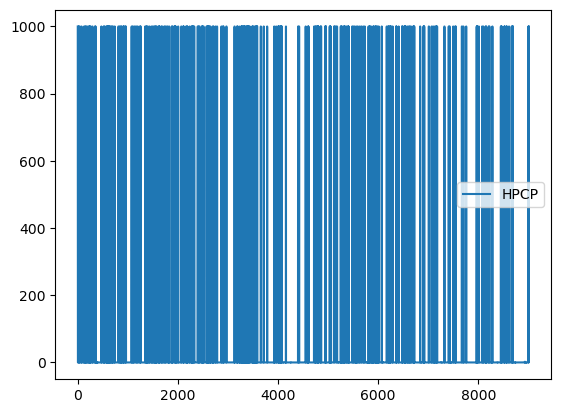

In [5]:
# Plotting hourly precipiation in Boulder CO
precip.plot()

# Read in missing data values 

Metadata indicates missing values are 999.99. 
We can directly read in this value as an NA value using `pd.read_csv`.

In [19]:
# Read in CSV indicating NA values based on metadata
precip = pd.read_csv(URL, na_values=[999.99])

precip.head()

,STATION,STATION_NAME,DATE,HPCP,Measurement Flag,Quality Flag
0,COOP:055881,NEDERLAND 5 NNW CO US,20000101 00:00,NaN,],
1,COOP:055881,NEDERLAND 5 NNW CO US,20000101 01:00,0.0,g,
2,COOP:055881,NEDERLAND 5 NNW CO US,20000102 20:00,0.0,,q
3,COOP:055881,NEDERLAND 5 NNW CO US,20000103 01:00,0.0,,q
4,COOP:055881,NEDERLAND 5 NNW CO US,20000103 05:00,0.0,,q


<Axes: >

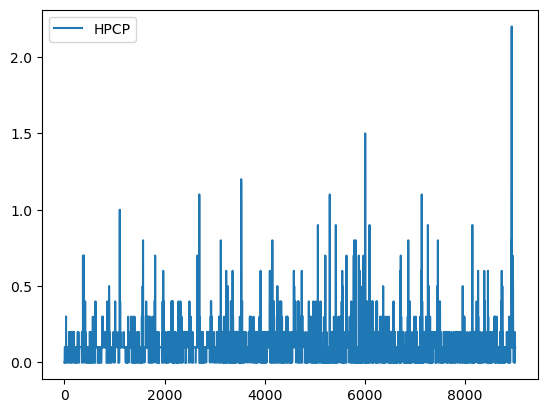

In [7]:
precip.plot()

# Convert strings into dates 
Notice `date` column in out data frame is not of type datetime

In [9]:
# Check wehter DATE column is of type `datetime`: 
precip.dtypes

STATION              object
STATION_NAME         object
DATE                 object
HPCP                float64
Measurement Flag     object
Quality Flag         object
dtype: object

In [20]:
# Convert DATE column to timestamps
pd.to_datetime(precip.DATE)

0      2000-01-01 00:00:00
1      2000-01-01 01:00:00
2      2000-01-02 20:00:00
3      2000-01-03 01:00:00
4      2000-01-03 05:00:00
               ...        
9001   2013-12-22 01:00:00
9002   2013-12-23 00:00:00
9003   2013-12-23 02:00:00
9004   2013-12-29 01:00:00
9005   2013-12-31 00:00:00
Name: DATE, Length: 9006, dtype: datetime64[ns]

In [21]:
# Convert DATE column to timestamps
precip.DATE = pd.to_datetime(precip.DATE)

# Check DATE column data type is updated
print(precip.dtypes)

# Check new values
precip.DATE.head()

STATION                     object
STATION_NAME                object
DATE                datetime64[ns]
HPCP                       float64
Measurement Flag            object
Quality Flag                object
dtype: object


0   2000-01-01 00:00:00
1   2000-01-01 01:00:00
2   2000-01-02 20:00:00
3   2000-01-03 01:00:00
4   2000-01-03 05:00:00
Name: DATE, dtype: datetime64[ns]

In [22]:
precip.dtypes

STATION                     object
STATION_NAME                object
DATE                datetime64[ns]
HPCP                       float64
Measurement Flag            object
Quality Flag                object
dtype: object

<Axes: xlabel='DATE'>

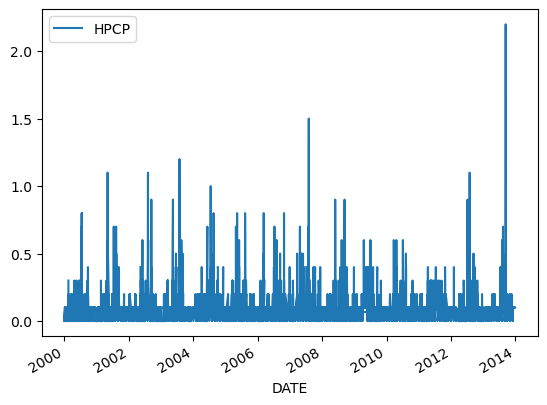

In [24]:
precip.plot(x='DATE', y='HPCP')

In [25]:
# Set DATE coumn as index
precip = precip.set_index('DATE')

# Inspect new index
precip.head()

,STATION,STATION_NAME,HPCP,Measurement Flag,Quality Flag
DATE,,,,,
2000-01-01 00:00:00,COOP:055881,NEDERLAND 5 NNW CO US,NaN,],
2000-01-01 01:00:00,COOP:055881,NEDERLAND 5 NNW CO US,0.0,g,
2000-01-02 20:00:00,COOP:055881,NEDERLAND 5 NNW CO US,0.0,,q
2000-01-03 01:00:00,COOP:055881,NEDERLAND 5 NNW CO US,0.0,,q
2000-01-03 05:00:00,COOP:055881,NEDERLAND 5 NNW CO US,0.0,,q


<Axes: xlabel='DATE'>

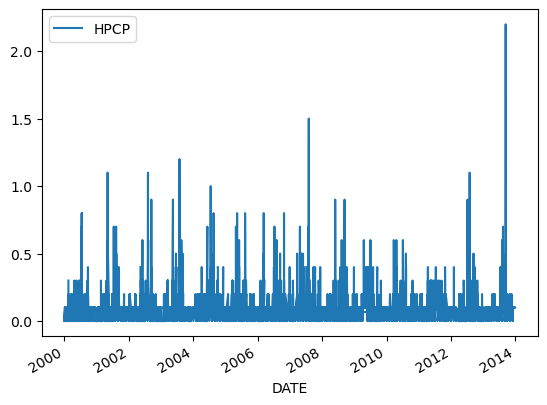

In [26]:
precip.plot()

In [29]:
## Read in dataset in a specific format
precip = pd.read_csv(URL, 
                    na_values=[999.99],
                    index_col=["DATE"],
                    parse_dates=["DATE"])

precip.head()

,STATION,STATION_NAME,HPCP,Measurement Flag,Quality Flag
DATE,,,,,
2000-01-01 00:00:00,COOP:055881,NEDERLAND 5 NNW CO US,NaN,],
2000-01-01 01:00:00,COOP:055881,NEDERLAND 5 NNW CO US,0.0,g,
2000-01-02 20:00:00,COOP:055881,NEDERLAND 5 NNW CO US,0.0,,q
2000-01-03 01:00:00,COOP:055881,NEDERLAND 5 NNW CO US,0.0,,q
2000-01-03 05:00:00,COOP:055881,NEDERLAND 5 NNW CO US,0.0,,q


# Subetting by date 

We can use `.loc[year-motnh` to select data from a specfic year and month

In [31]:
# Select 2013 precipitation data
precip.loc['2013']

,STATION,STATION_NAME,HPCP,Measurement Flag,Quality Flag
DATE,,,,,
2013-01-01 01:00:00,COOP:055881,NEDERLAND 5 NNW CO US,0.0,g,
2013-01-10 02:00:00,COOP:055881,NEDERLAND 5 NNW CO US,NaN,[,
2013-01-13 00:00:00,COOP:055881,NEDERLAND 5 NNW CO US,NaN,],
2013-01-26 20:00:00,COOP:055881,NEDERLAND 5 NNW CO US,0.1,,
2013-01-28 23:00:00,COOP:055881,NEDERLAND 5 NNW CO US,0.1,,
...,...,...,...,...,...
2013-12-22 01:00:00,COOP:050843,BOULDER 2 CO US,NaN,[,
2013-12-23 00:00:00,COOP:050843,BOULDER 2 CO US,NaN,],
2013-12-23 02:00:00,COOP:050843,BOULDER 2 CO US,0.1,,


<Axes: xlabel='DATE'>

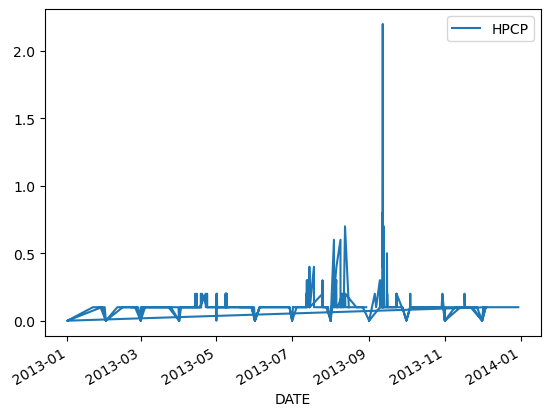

In [32]:
precip.loc['2013'].plot()

## Resample 

Resampling atime series means concerting a time series from one frequency to another. For example, monthly to yearly(downsampling) or weekly to daily (upsampling).

We can resample with `resample()` method. The simpliest use to call 

```
df.resample(new_frequency).aggregator_function()
```
where

- `new_frequency`: is a string representing the new frequence to resample the data: 'D' for day, "W" for week, "Y" for year, "M for motnh "

- `aggregation_function()`: Is the functon we will use to aggregate the data into the new frequenc. For example `max()`, `min()`, `sum()`, `average()`. 

#### Example

Our 2013 precipiation data has hourly frequency, we want to resample it to daily frequency (downsampling)

In [35]:
# Resample 2013 hourly data to daily frequency 
# Total daily precipitation in 2013
daily_precip_2013 = precip.loc['2013'].resample('D').sum()

daily_precip_2013.head(3)

,STATION,STATION_NAME,HPCP,Measurement Flag,Quality Flag
DATE,,,,,
2013-01-01,COOP:050183COOP:055881COOP:050183COOP:055121CO...,ALLENSPARK 2 SE CO USNEDERLAND 5 NNW CO USALLE...,0.0,]g[gg,
2013-01-02,0,0,0.0,0,0
2013-01-03,0,0,0.0,0,0


<Axes: title={'center': 'Precipitation in Boulder Colorado in 2013'}, xlabel='DATE', ylabel='Daily Precipitation (inches)'>

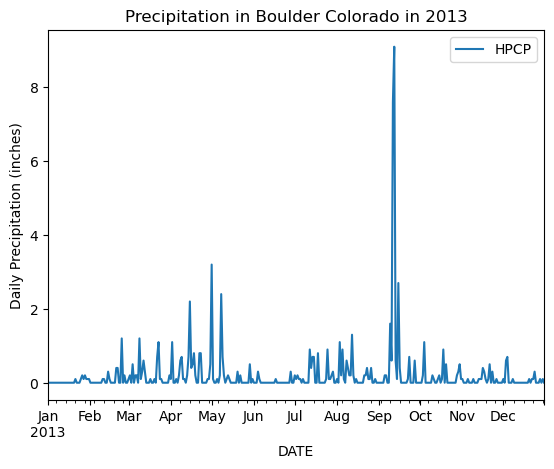

In [37]:
daily_precip_2013.plot(ylabel = "Daily Precipitation (inches)", 
                      title = "Precipitation in Boulder Colorado in 2013")

<Axes: title={'center': 'Precipitation in Boulder, CO during 2013'}, xlabel=' ', ylabel='daily precipitation (in)'>

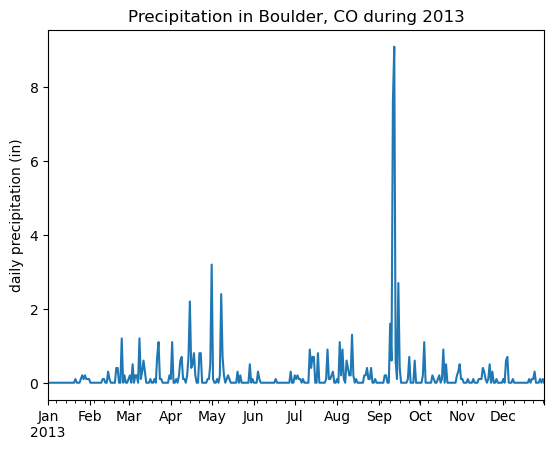

In [38]:
import pandas as pd

'''
Read in Boulder, CO hourly precipitation data 
HPCP = hourly precipitation (unique numerical column in data frame)
'''
URL = 'https://raw.githubusercontent.com/carmengg/eds-220-book/main/data/boulder_colorado_2013_hourly_precipitation.csv'
precip = pd.read_csv(URL, 
                    na_values=[999.99],  # Known from metadata
                    index_col=['DATE'], 
                    parse_dates=['DATE']
                    )


# Calculate daily total precipitation during 2013
daily_precip_2013 = (precip.loc['2013']
                            .resample('D')
                            .sum()
                            .rename(columns={'HPCP':'daily_precipitation'})  
                            )

# Plot time series
daily_precip_2013.plot(ylabel='daily precipitation (in)', 
                       xlabel=' ',
                       title='Precipitation in Boulder, CO during 2013',
                       legend=False)